<a href="https://colab.research.google.com/github/mayank-2105/TeamHan/blob/main/Intro_to_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls '/content/drive'

MyDrive


In [ ]:
# /content/drive/MyDrive/Introduction to GeoPandas/Shapefiles/area_of_interest.CPG

In [ ]:
!pip install --quiet pandas fiona shapely pyproj rtree

     |████████████████████████████████| 15.4 MB 7.3 MB/s 
     |████████████████████████████████| 6.3 MB 60.2 MB/s 
     |████████████████████████████████| 994 kB 58.3 MB/s 


In [ ]:
! pip --quiet install geopandas

     |████████████████████████████████| 1.0 MB 8.0 MB/s 


In [ ]:
import geopandas as gpd

**IMPORTING A SHAPEFILE AND PLOTTING IT USING GEOPANDAS**

In [ ]:
districts = gpd.read_file(r'/content/drive/MyDrive/Introduction to GeoPandas/Shapefiles/districts.shp')

In [ ]:
districts.head()

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."


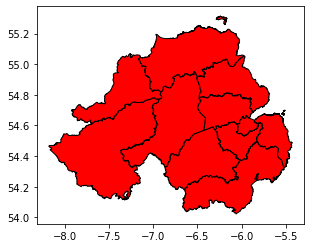

In [ ]:
districts.plot(color = 'red',edgecolor = 'black')

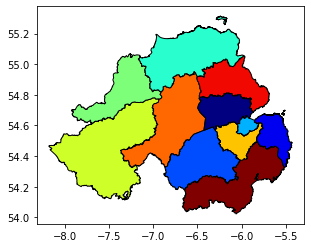

In [ ]:
districts.plot(cmap = 'jet',edgecolor = 'black',column = 'district')

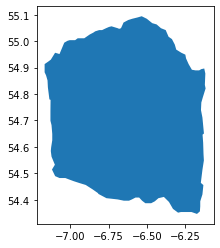

In [28]:
area_of_interest = gpd.read_file(r'/content/drive/MyDrive/Introduction to GeoPandas/Shapefiles/area_of_interest.shp')
area_of_interest.plot()

**PLOTTING LAYERS SIDE BY SIDE**

In [ ]:
import matplotlib.pyplot as plt

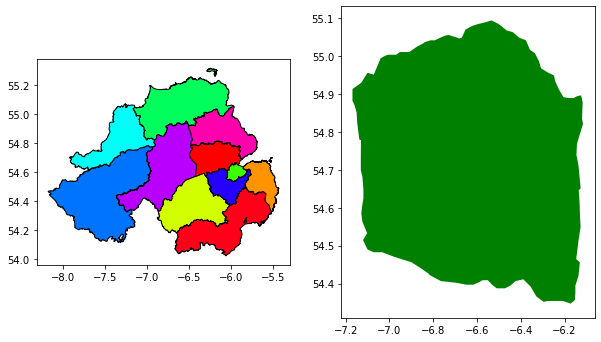

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize = (10,7))
districts.plot(ax=ax1,cmap = 'hsv',edgecolor = 'black',column = 'district')
area_of_interest.plot(ax=ax2,color='green')

**PLOTTING MULTIPLE LAYERS**

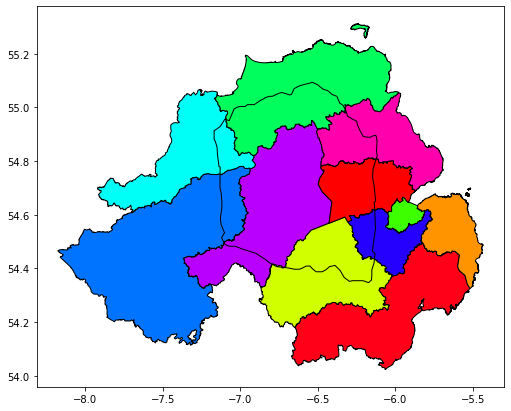

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
districts.plot(ax=ax,cmap = 'hsv',edgecolor = 'black',column = 'district')
area_of_interest.plot(ax=ax,color='none',edgecolor='black')

In [ ]:
atms = gpd.read_file('/content/drive/MyDrive/Introduction to GeoPandas/Shapefiles/atms.shp')
atms.head()

,operator,geometry
0,Northern Bank,MULTIPOINT (-6.65841 54.50122)
1,None,MULTIPOINT (-6.22666 54.72956)
2,Bank of Ireland,MULTIPOINT (-6.22038 54.80819)
3,None,MULTIPOINT (-6.29858 54.43323)
4,None,MULTIPOINT (-6.21401 54.59141)


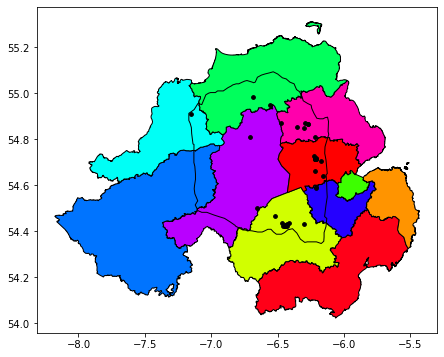

In [30]:
fig, ax = plt.subplots(figsize = (8,6))
districts.plot(ax=ax,cmap = 'hsv',edgecolor = 'black',column = 'district')
area_of_interest.plot(ax=ax,color='none',edgecolor='black')
atms.plot(ax=ax,color='black',markersize=14)

**REPROJECTING DATA TO A DIFFERENT CO-ORDINATE REFERENCE SYSTEM**

In [29]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

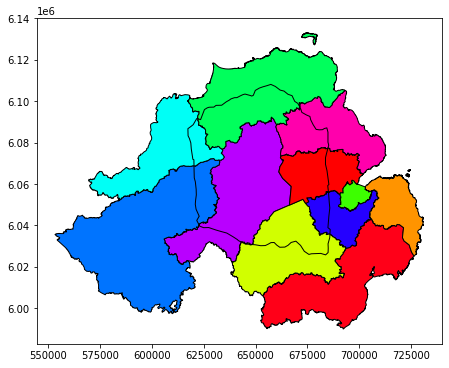

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
districts1 = districts.to_crs(epsg = 32629)
districts1.plot(ax = ax, cmap = 'hsv', edgecolor = 'black', column = 'district')
area_of_interest1 = area_of_interest.to_crs(epsg = 32629)
area_of_interest1.plot(ax = ax, color = 'none', edgecolor = 'black')

**INTERSECTING DIFFERENT LAYERS**

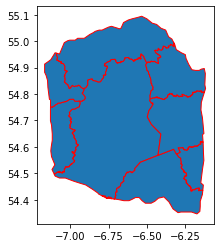

In [ ]:
districts_in_aoi = gpd.overlay(districts, area_of_interest, how = 'intersection')
districts_in_aoi.plot(edgecolor = 'red')

In [ ]:
districts_in_aoi

,district,Id,geometry
0,Mid Ulster,0,"POLYGON ((-6.53253 54.94901, -6.53244 54.94886..."
1,Mid and East Antrim,0,"POLYGON ((-6.12268 54.80817, -6.12276 54.80817..."
2,Lisburn and Castlereagh,0,"POLYGON ((-6.13370 54.43528, -6.13374 54.43531..."
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((-6.27819 54.54960, -6.27819 54..."
4,Antrim and Newtownabbey,0,"POLYGON ((-6.16405 54.81063, -6.16394 54.81063..."
5,Fermanagh and Omagh,0,"POLYGON ((-6.99806 54.78010, -6.99800 54.78010..."
6,Derry City and Strabane,0,"POLYGON ((-7.09029 54.95438, -7.09031 54.95435..."
7,Causeway Coast and Glens,0,"POLYGON ((-6.32226 54.99264, -6.32227 54.99264..."


In [ ]:
districts_in_aoi['area'] = districts_in_aoi.area/1000000 # divide by 1e6 because the crs measures the area in sq. m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
districts_in_aoi

,district,Id,geometry,area
0,Mid Ulster,0,"POLYGON ((-6.53253 54.94901, -6.53244 54.94886...",2.192888e-07
1,Mid and East Antrim,0,"POLYGON ((-6.12268 54.80817, -6.12276 54.80817...",5.229251e-08
2,Lisburn and Castlereagh,0,"POLYGON ((-6.13370 54.43528, -6.13374 54.43531...",2.105566e-08
3,"Armagh City, Banbridge and Craigavon",0,"MULTIPOLYGON (((-6.27819 54.54960, -6.27819 54...",7.674426e-08
4,Antrim and Newtownabbey,0,"POLYGON ((-6.16405 54.81063, -6.16394 54.81063...",6.448692e-08
5,Fermanagh and Omagh,0,"POLYGON ((-6.99806 54.78010, -6.99800 54.78010...",3.661031e-08
6,Derry City and Strabane,0,"POLYGON ((-7.09029 54.95438, -7.09031 54.95435...",2.622602e-08
7,Causeway Coast and Glens,0,"POLYGON ((-6.32226 54.99264, -6.32227 54.99264...",1.048814e-07


In [ ]:
rt = gpd.read_file('/content/drive/MyDrive/Introduction to GeoPandas/Shapefiles/railway_tracks.shp')

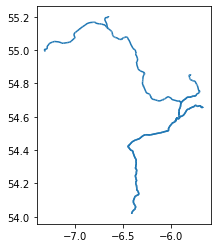

In [ ]:
rt.plot(figsize=(4,4))

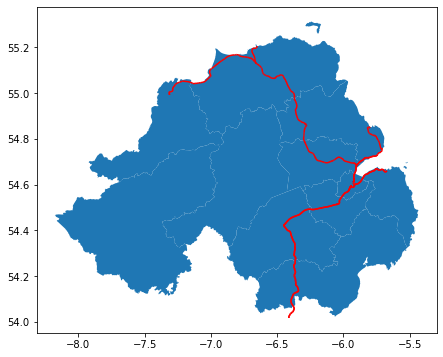

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
districts.plot(ax = ax)
rt.plot(ax = ax, color = 'red')